In [ ]:
# ==========================
# 1. Upload the dataset (zip file)
# ==========================
from google.colab import files
from zipfile import ZipFile
import os
import pandas as pd


uploaded = files.upload()
zip_name = list(uploaded.keys())[0]


extract_folder = "/content/data"
with ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Extracted folders/files:", os.listdir(extract_folder))


Saving Lewis_et_al_2022_DGA_data.zip to Lewis_et_al_2022_DGA_data.zip
Extracted folders/files: ['__MACOSX', 'Lewis et al 2022 DGA data']


In [ ]:
# ==========================
# 2. Auto-detect CSV file(s)
# ==========================
csv_files = []
for root, dirs, files in os.walk(extract_folder):
    for f in files:
        if f.lower().endswith(".csv") and not f.startswith('._'):
            csv_files.append(os.path.join(root, f))

print("Detected CSV files:", csv_files)
file_path = csv_files[0]
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='latin-1')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')
print("Loaded file:", file_path)
print("Shape:", df.shape)
df.head()

Detected CSV files: ['/content/data/Lewis et al 2022 DGA data/Lewis_et_al_2022_Transformer_B.csv', '/content/data/Lewis et al 2022 DGA data/Lewis_et_al_2022_Transformer_I.csv', '/content/data/Lewis et al 2022 DGA data/Lewis_et_al_2022_Transformer_A.csv', '/content/data/Lewis et al 2022 DGA data/Lewis_et_al_2022_Transformer_D.csv', '/content/data/Lewis et al 2022 DGA data/Lewis_et_al_2022_Transformer_F.csv', '/content/data/Lewis et al 2022 DGA data/Lewis_et_al_2022_Transformer_H.csv', '/content/data/Lewis et al 2022 DGA data/Lewis_et_al_2022_Transformer_C.csv', '/content/data/Lewis et al 2022 DGA data/Lewis_et_al_2022_Transformer_G.csv', '/content/data/Lewis et al 2022 DGA data/Lewis_et_al_2022_Transformer_E.csv', '/content/data/Lewis et al 2022 DGA data/Lewis_et_al_2022_Transformer_L.csv', '/content/data/Lewis et al 2022 DGA data/Lewis_et_al_2022_Transformer_M.csv', '/content/data/Lewis et al 2022 DGA data/Lewis_et_al_2022_Transformer_K.csv', '/content/data/Lewis et al 2022 DGA data/Le

,Timestamp,BLUE: Hydrogen (ppm),BLUE: Methane (ppm),BLUE: Acetylene (ppm),BLUE: Ethylene (ppm),BLUE: Ethane (ppm),BLUE: Carbon Monoxide (ppm),BLUE: Carbon Dioxide (ppm),BLUE: Oxygen (ppm),BLUE: Water (ppm),...,YELLOW: Water (ppm),RED: Hydrogen (ppm),RED: Methane (ppm),RED: Acetylene (ppm),RED: Ethylene (ppm),RED: Ethane (ppm),RED: Carbon Monoxide (ppm),RED: Carbon Dioxide (ppm),RED: Oxygen (ppm),RED: Water (ppm)
0,18/05/2015 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.6,41.1,0.2,7.4,109.5,255.1,617.0,674.9,2.0
1,18/05/2015 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17/05/2015 23:00,10.6,48.2,0.2,6.8,123.4,257.1,735.0,660.1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17/05/2015 17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.6,41.2,0.1,7.9,111.7,255.2,613.0,668.8,2.0
4,17/05/2015 16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# ==========================
# Reshape dataset: wide per transformer
df_long = df.melt(id_vars=["Timestamp"], var_name="Transformer_Gas", value_name="ppm")
df_long[["Transformer","Gas"]] = df_long["Transformer_Gas"].str.split(": ", expand=True)

df_long["Transformer"] = df_long["Transformer"].str.replace(":","").str.strip()
df_long["Gas"] = df_long["Gas"].str.replace(" (ppm)","").str.strip()

df_wide = df_long.pivot_table(
    index=["Timestamp","Transformer"],
    columns="Gas",
    values="ppm"
).reset_index()
df_wide["Timestamp"] = pd.to_datetime(df_wide["Timestamp"], errors="coerce")

df_wide.head()


Gas,Timestamp,Transformer,Acetylene,Carbon Dioxide,Carbon Monoxide,Ethane,Ethylene,Hydrogen,Methane,Oxygen,Water
0,2012-01-01 00:00:00,YELLOW,0.5,686.0,268.8,113.7,5.2,24.8,35.2,147.3,3.6
1,2012-01-01 01:00:00,BLUE,0.0,531.0,252.4,153.5,5.2,21.4,46.7,144.0,3.4
2,2012-01-01 01:00:00,RED,0.0,531.0,252.4,153.5,5.2,21.4,46.7,144.0,3.4
3,2012-01-01 01:00:00,YELLOW,0.0,531.0,252.4,153.5,5.2,21.4,46.7,144.0,3.4
4,2012-01-01 03:00:00,RED,0.3,446.0,285.2,144.9,8.1,21.7,43.1,147.9,3.3


In [ ]:
# Melt to long format
df_long = df.melt(id_vars=["Timestamp"], var_name="Transformer_Gas", value_name="ppm")

# Split transformer and gas
df_long[["Transformer","Gas"]] = df_long["Transformer_Gas"].str.split(": ", expand=True)

# Clean names
df_long["Transformer"] = df_long["Transformer"].str.replace(":","").str.strip()
df_long["Gas"] = df_long["Gas"].str.replace(" (ppm)","").str.strip()

# Convert timestamp
df_long["Timestamp"] = pd.to_datetime(df_long["Timestamp"], errors="coerce")

df_long.head()


/tmp/ipython-input-598105442.py:12: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_long["Timestamp"] = pd.to_datetime(df_long["Timestamp"], errors="coerce")


,Timestamp,Transformer_Gas,ppm,Transformer,Gas
0,2015-05-18 01:00:00,BLUE: Hydrogen (ppm),NaN,BLUE,Hydrogen
1,2015-05-18 00:00:00,BLUE: Hydrogen (ppm),NaN,BLUE,Hydrogen
2,2015-05-17 23:00:00,BLUE: Hydrogen (ppm),10.6,BLUE,Hydrogen
3,2015-05-17 17:00:00,BLUE: Hydrogen (ppm),NaN,BLUE,Hydrogen
4,2015-05-17 16:00:00,BLUE: Hydrogen (ppm),NaN,BLUE,Hydrogen


In [ ]:
# ==========================
# Compute ratios
# ==========================
import numpy as np
df_wide = df_long.pivot_table(
    index=["Timestamp","Transformer"],
    columns="Gas",
    values="ppm"
).reset_index()


In [ ]:
# ==========================
# Rogers classification
# ==========================
def rogers_classify(row):
    r1, r2, r3 = row["R1_CH4_H2"], row["R2_C2H2_C2H4"], row["R3_C2H4_C2H6"]

    if r1 < 0.1 and r2 < 0.5 and r3 < 1.0:
        return "Partial Discharge"
    elif r1 > 0.1 and r2 > 1.0 and r3 > 1.0:
        return "Arcing"
    elif r1 > 1.0 and r2 < 0.5 and r3 < 1.0:
        return "Thermal <300C"
    elif r1 > 1.0 and r2 < 0.5 and r3 > 1.0:
        return "Thermal >700C"
    else:
        return "Normal"

df_wide["Rogers_Fault"] = df_wide.apply(rogers_classify, axis=1)

df_wide["Rogers_Fault"].value_counts()


,count
Rogers_Fault,
Thermal <300C,16566
Normal,5774
Partial Discharge,1842


In [ ]:
from sklearn.model_selection import train_test_split

# Features: gases + ratios
features = ["Hydrogen","Methane","Acetylene","Ethylene","Ethane",
            "Carbon Monoxide","Carbon Dioxide",
            "R1_CH4_H2","R2_C2H2_C2H4","R3_C2H4_C2H6"]

X = df_wide[features].fillna(0)
y = df_wide["Rogers_Fault"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Train XGBoost

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train_enc)

y_pred_xgb_enc = xgb.predict(X_test)
y_pred_xgb = le.inverse_transform(y_pred_xgb_enc)   # decode back to strings
y_test_str = le.inverse_transform(y_test_enc)

print("Classification Report (XGBoost):")
print(classification_report(y_test_str, y_pred_xgb))

#  Train CatBoost

cat = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_seed=42
)

cat.fit(X_train, y_train_enc)

y_pred_cat_enc = cat.predict(X_test)
y_pred_cat = le.inverse_transform(y_pred_cat_enc.flatten())  # decode back

print("Classification Report (CatBoost):")
print(classification_report(y_test_str, y_pred_cat))



Classification Report (XGBoost):
                   precision    recall  f1-score   support

           Normal       1.00      1.00      1.00      1155
Partial Discharge       0.99      1.00      0.99       368
    Thermal <300C       1.00      1.00      1.00      3314

         accuracy                           1.00      4837
        macro avg       1.00      1.00      1.00      4837
     weighted avg       1.00      1.00      1.00      4837

Classification Report (CatBoost):
                   precision    recall  f1-score   support

           Normal       1.00      1.00      1.00      1155
Partial Discharge       0.99      0.99      0.99       368
    Thermal <300C       1.00      1.00      1.00      3314

         accuracy                           1.00      4837
        macro avg       1.00      1.00      1.00      4837
     weighted avg       1.00      1.00      1.00      4837



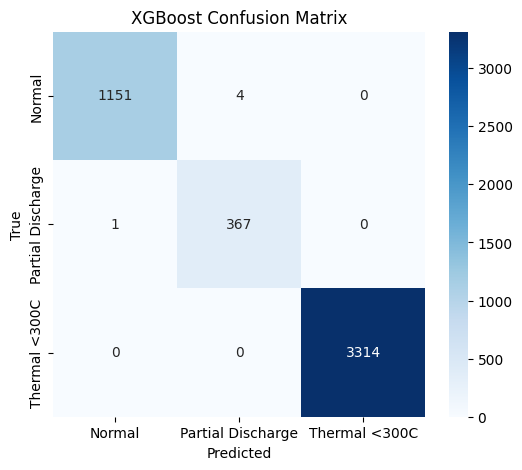

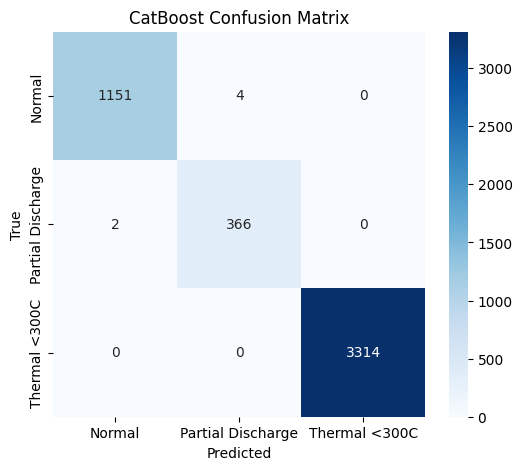

In [ ]:
def plot_cm(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.show()

labels = le.classes_  # class names in correct order

plot_cm(y_test_str, y_pred_xgb, labels, "XGBoost Confusion Matrix")
plot_cm(y_test_str, y_pred_cat, labels, "CatBoost Confusion Matrix")

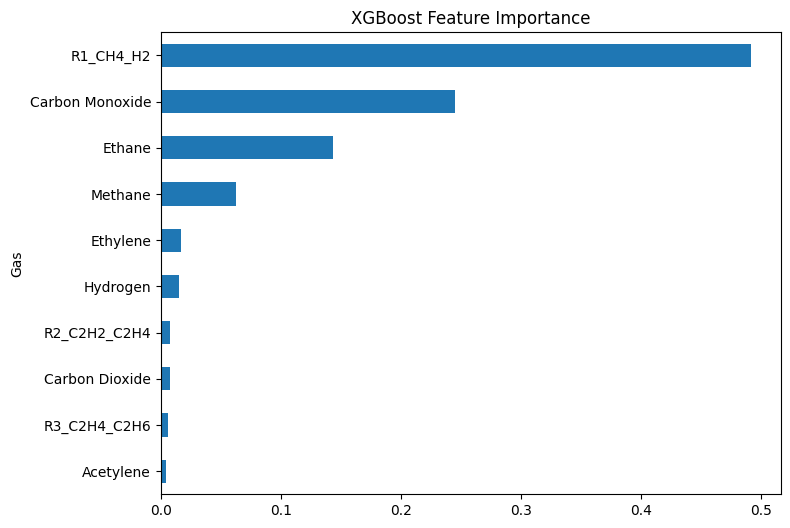

In [ ]:
xgb_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
xgb_importances.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("XGBoost Feature Importance")
plt.show()


 99%|===================| 14412/14511 [02:11<00:00]       

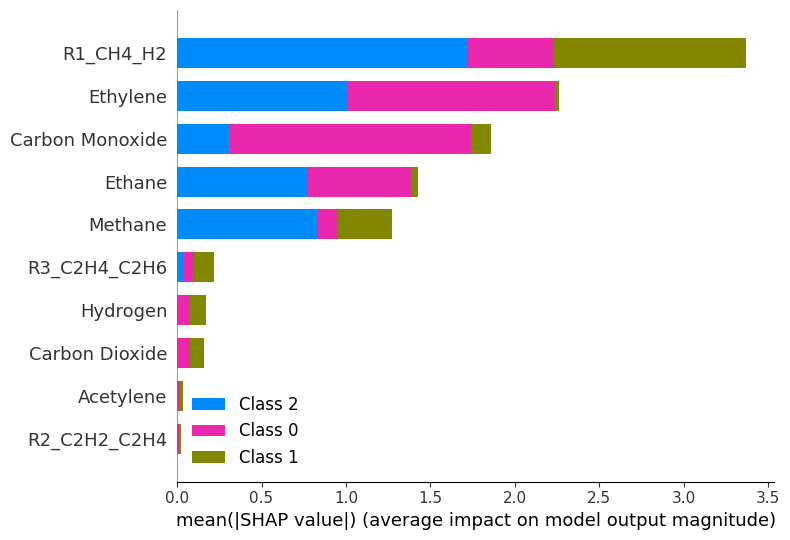

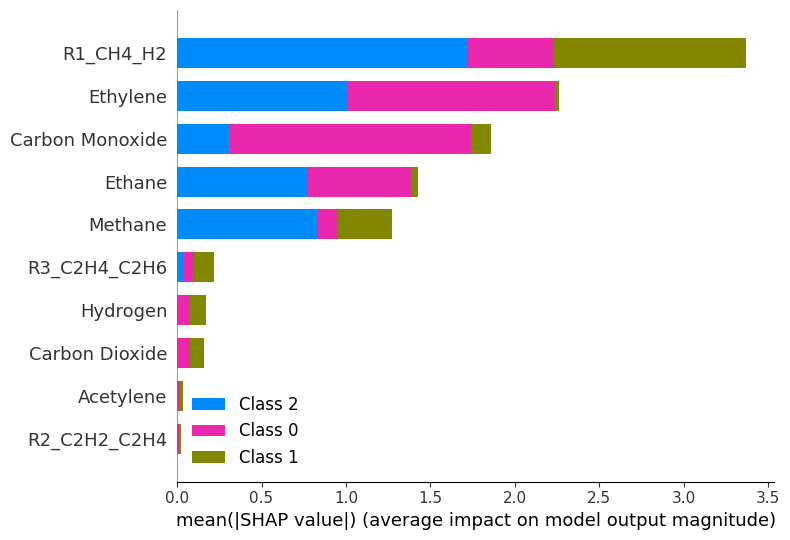

In [ ]:
import shap

explainer = shap.Explainer(xgb, X_train)
shap_values = explainer(X_test)


shap.summary_plot(shap_values, X_test, plot_type="bar")

shap.summary_plot(shap_values, X_test)


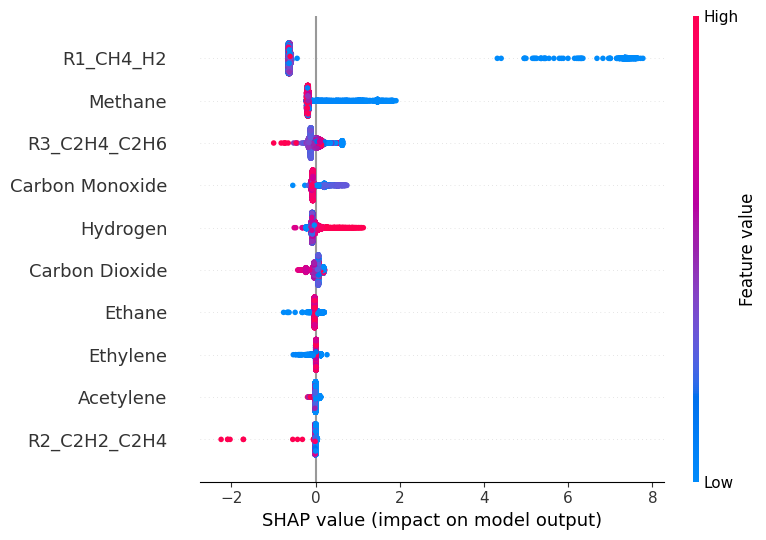

In [ ]:
# Focus on class "Partial Discharge"
class_idx = list(le.classes_).index("Partial Discharge")
shap.summary_plot(shap_values[:,:,class_idx], X_test, feature_names=X_test.columns)


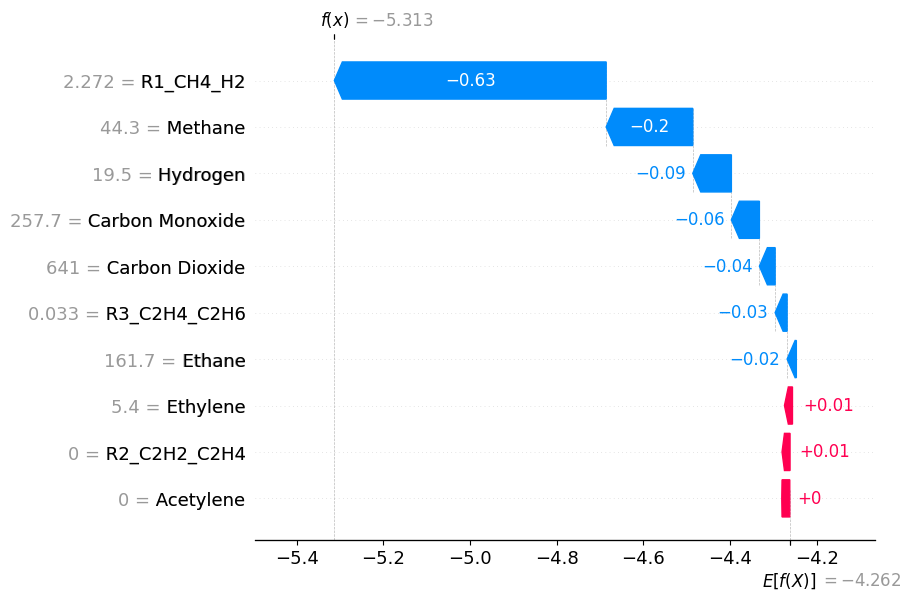

In [ ]:
# Picking a sample from test set
sample_idx = 0
class_idx = list(le.classes_).index("Partial Discharge")

shap.plots.waterfall(shap_values[sample_idx,:,class_idx], max_display=10)


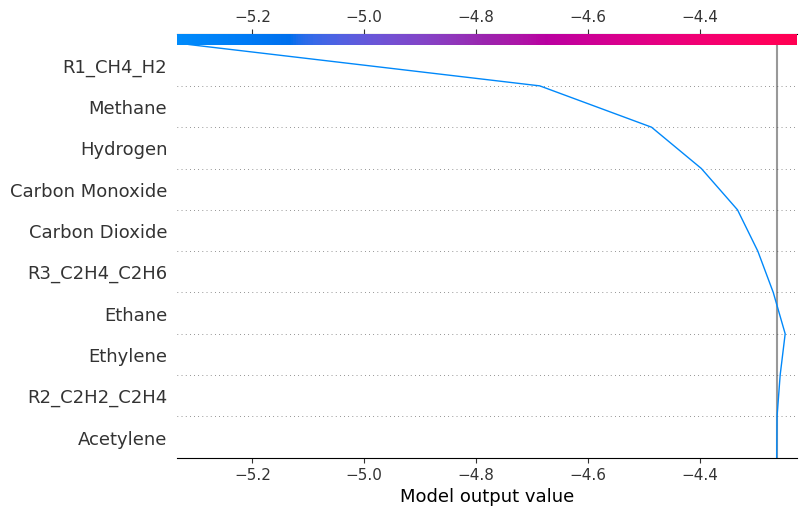

In [ ]:
sample_idx = 0
class_idx = list(le.classes_).index("Partial Discharge")

shap.decision_plot(
    explainer.expected_value[class_idx],
    shap_values.values[:,:,class_idx][sample_idx,:],
    feature_names=list(X_test.columns)   # <-- convert to list
)


In [ ]:
def explain_multiple_samples(class_name, shap_values, X_test, le, n_samples=3):
    """
    Generates SHAP waterfall plots for multiple samples of a given class.

    class_name : str
        Target class (must exist in le.classes_)
    shap_values : shap.Explanation
        SHAP values from explainer(X_test)
    X_test : pd.DataFrame
        Test features
    le : LabelEncoder
        To map class names to indices
    n_samples : int
        Number of samples to explain
    """
    class_idx = list(le.classes_).index(class_name)
    indices = [i for i, true_label in enumerate(le.inverse_transform(y_test_enc)) if true_label == class_name]

    print(f"\n=== Explaining {min(n_samples, len(indices))} samples for class '{class_name}' ===")

    for idx in indices[:n_samples]:
        print(f"\n--- Sample {idx} ---")
        shap.plots.waterfall(
            shap_values[idx,:,class_idx],
            max_display=10
        )



=== Explaining 3 samples for class 'Normal' ===

--- Sample 8 ---


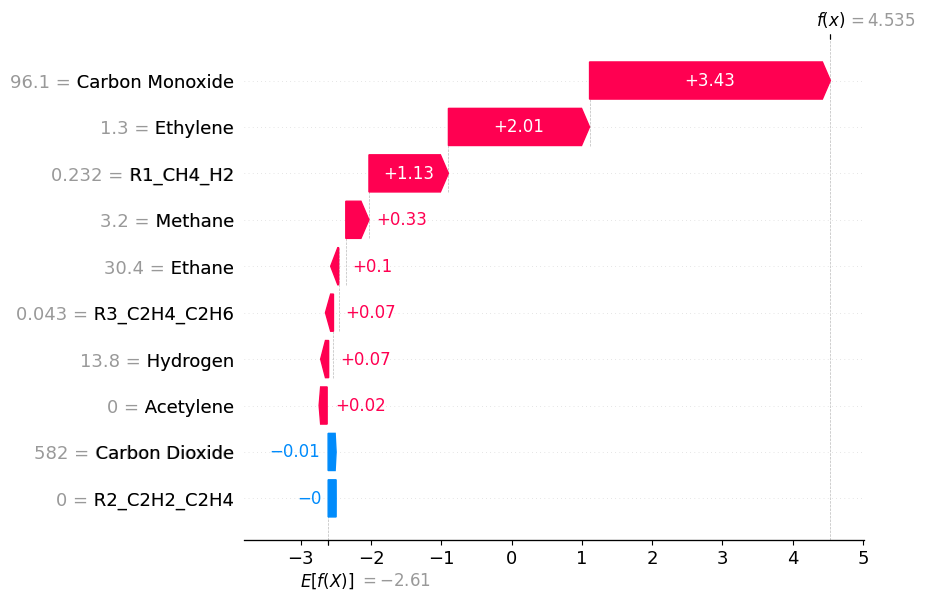

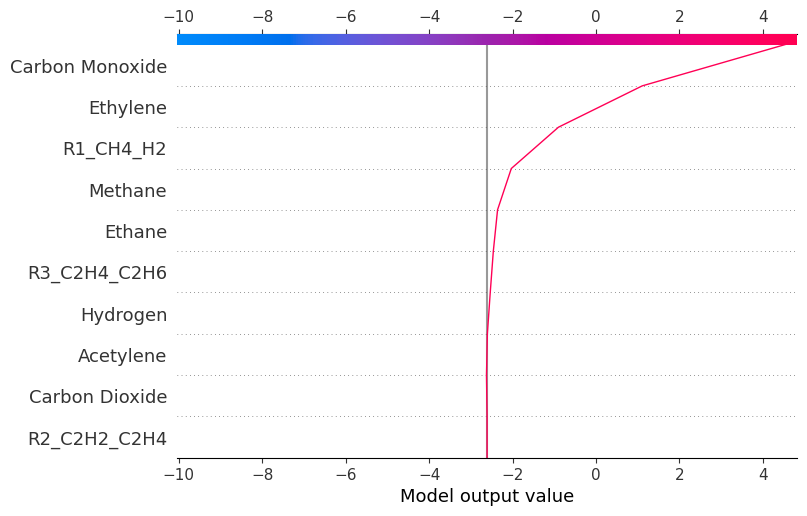


--- Sample 12 ---


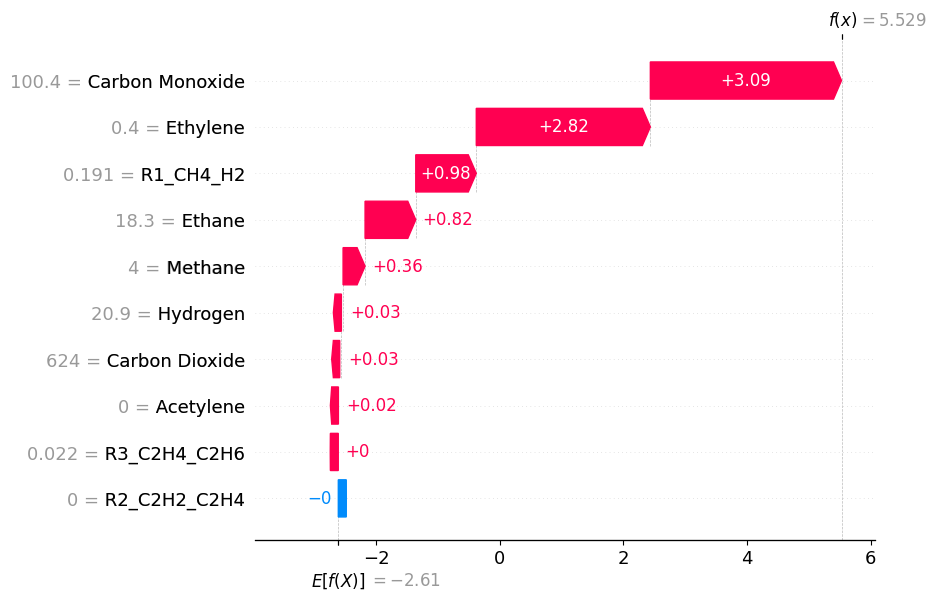

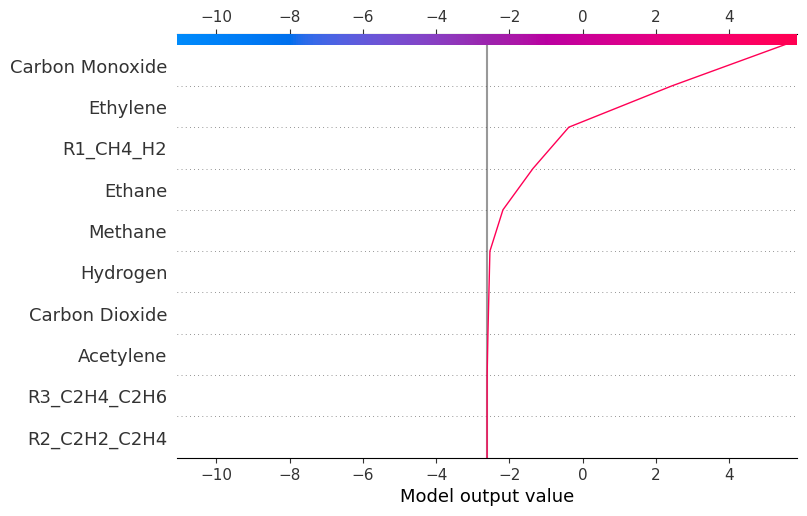


--- Sample 21 ---


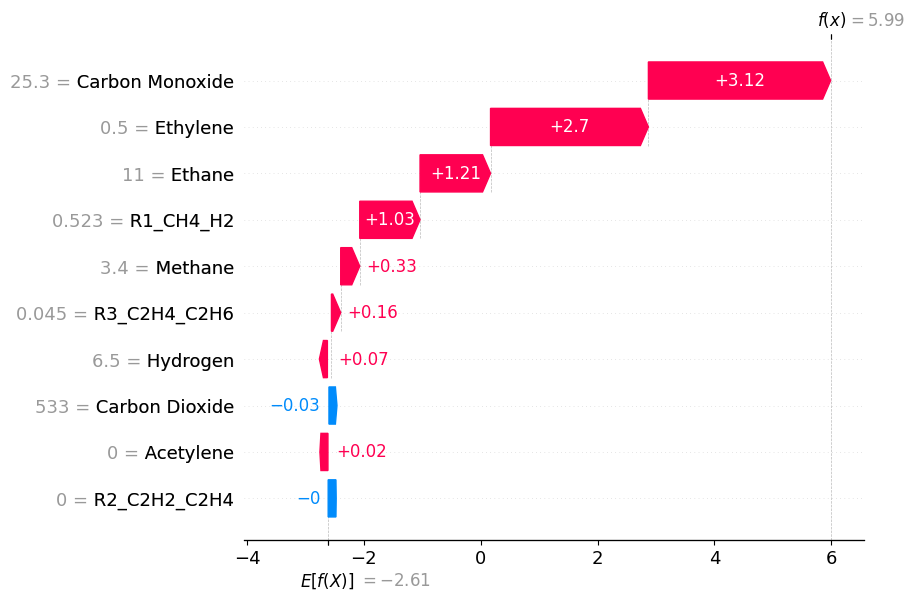

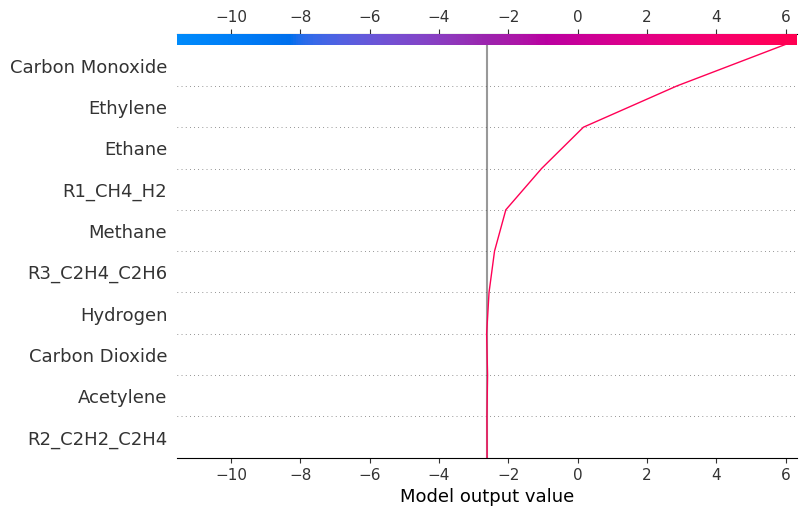


=== Explaining 3 samples for class 'Partial Discharge' ===

--- Sample 2 ---


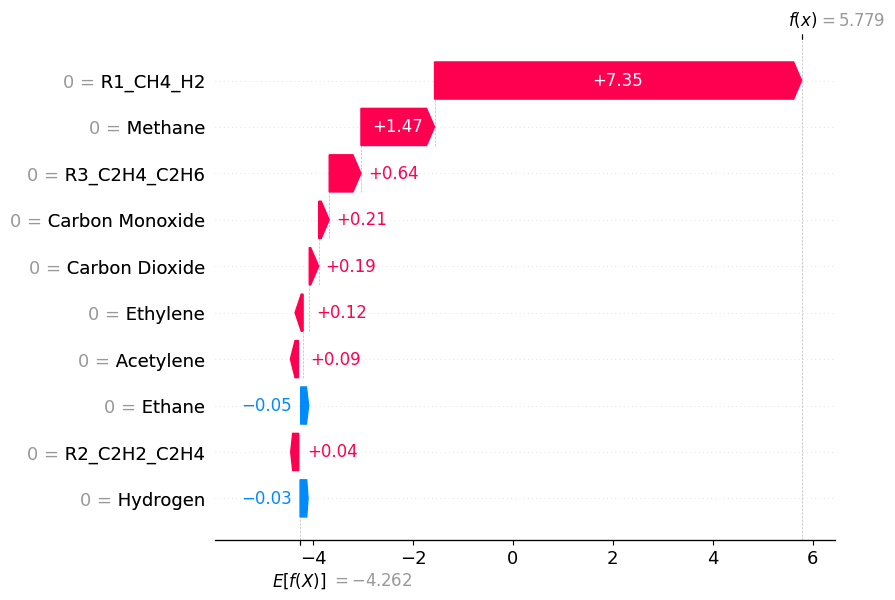

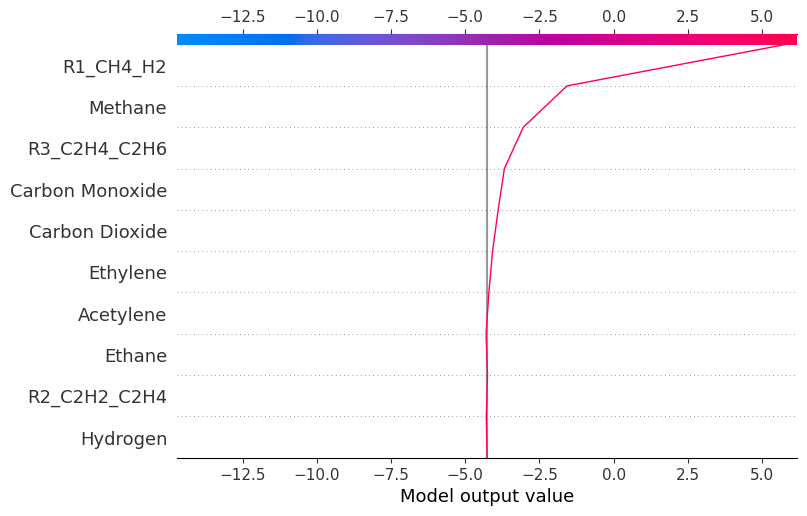


--- Sample 10 ---


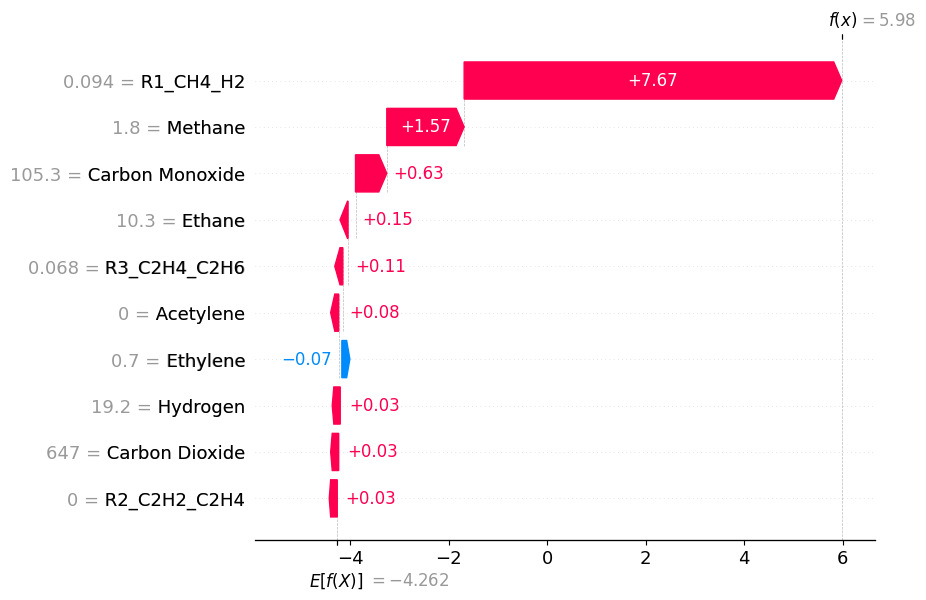

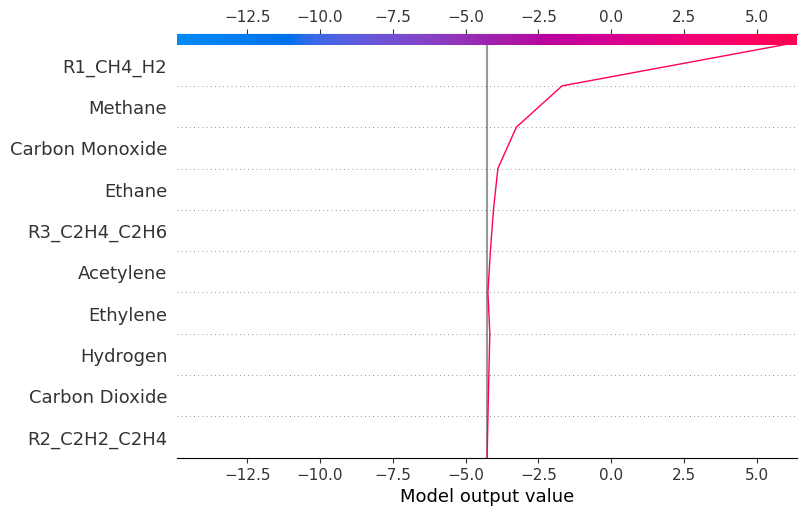


--- Sample 55 ---


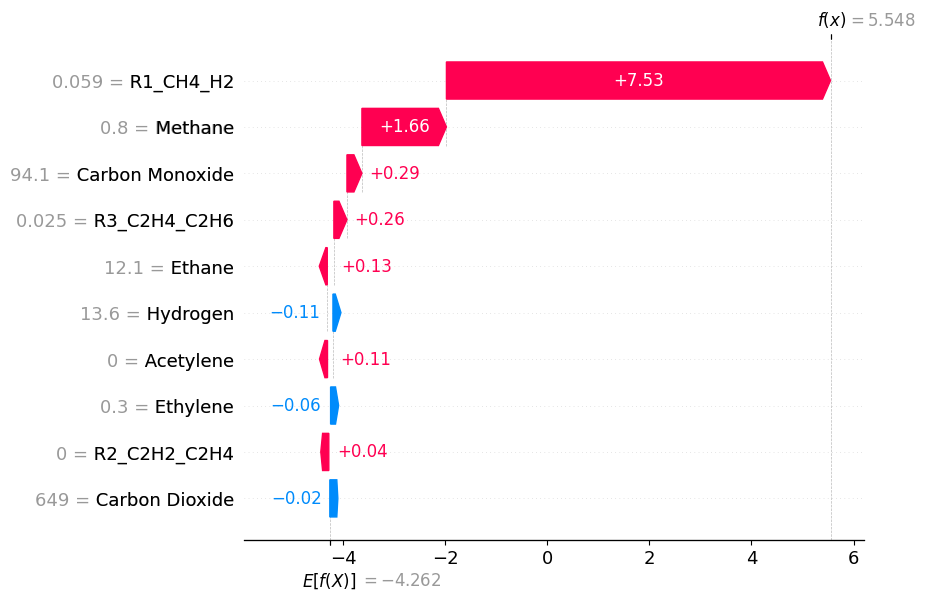

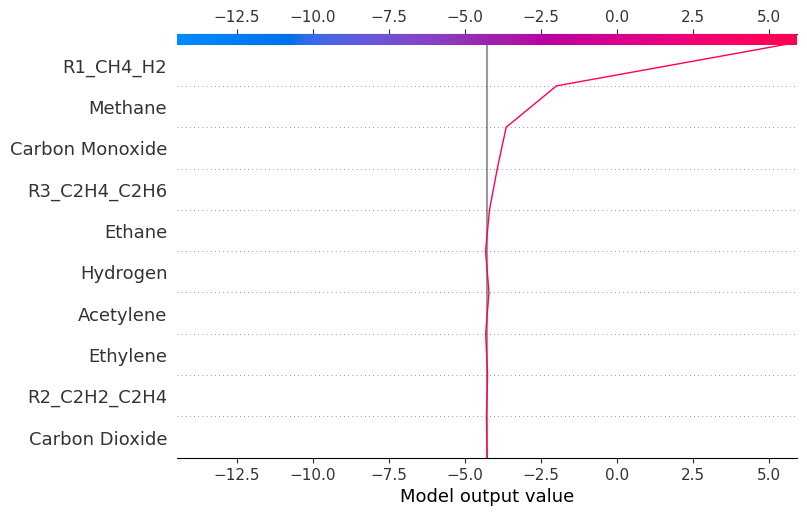


=== Explaining 3 samples for class 'Thermal <300C' ===

--- Sample 0 ---


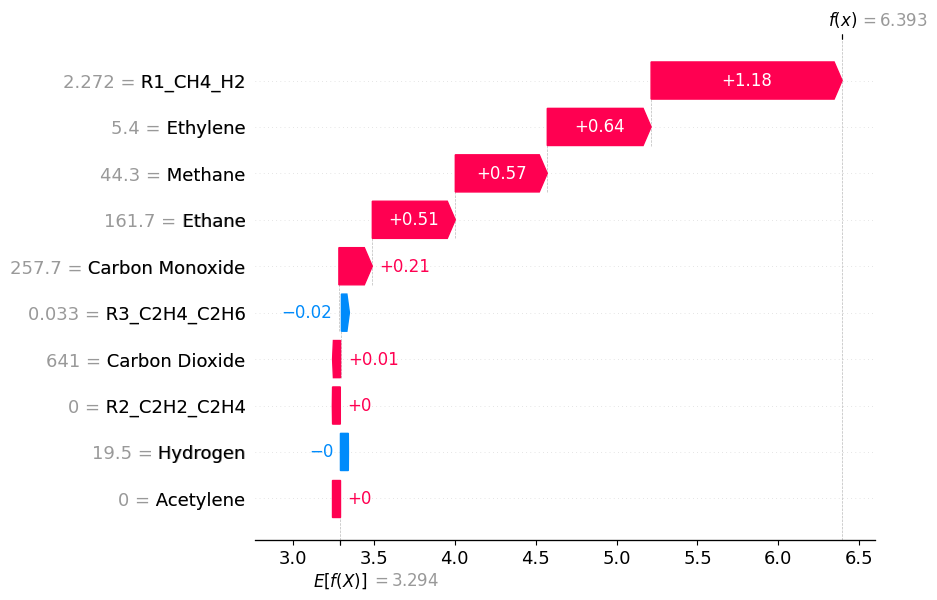

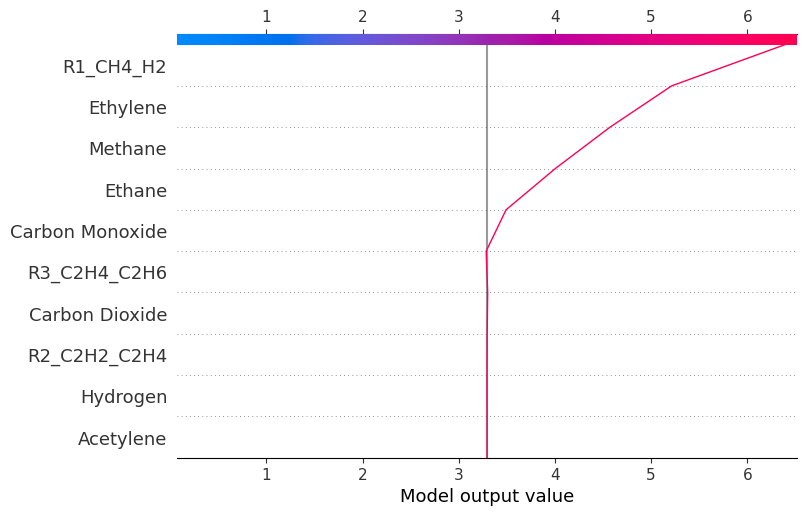


--- Sample 1 ---


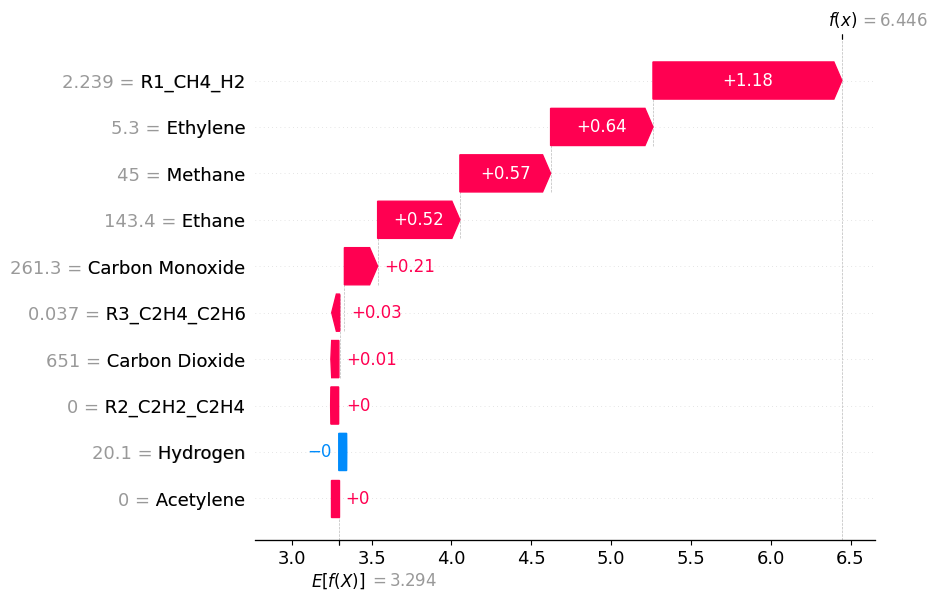

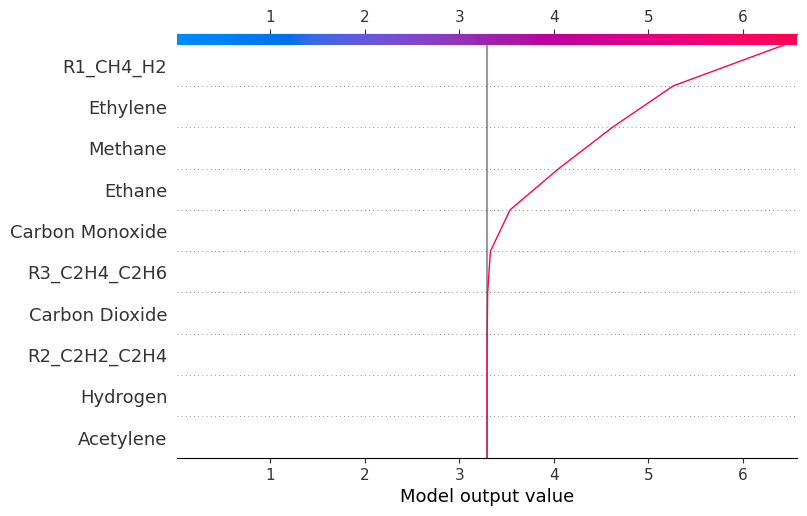


--- Sample 3 ---


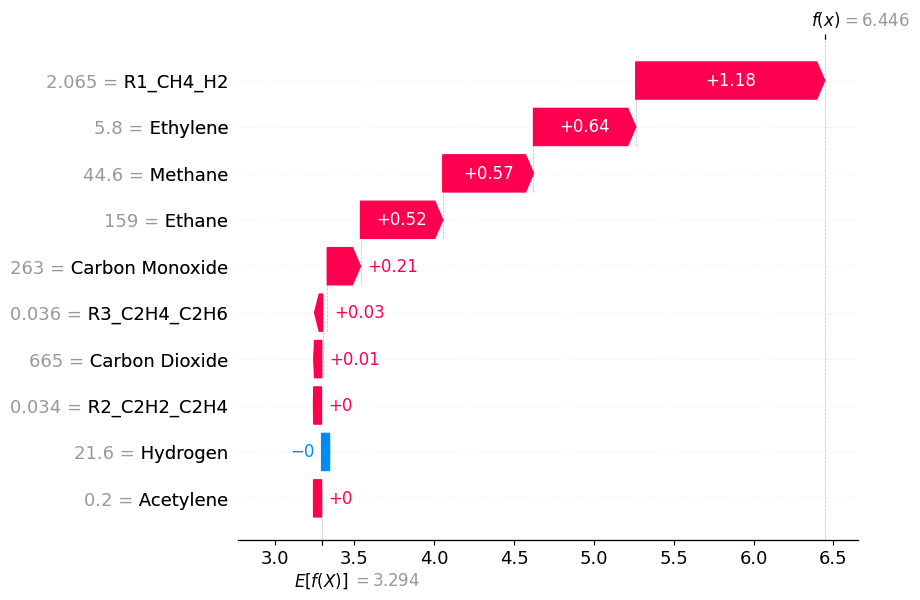

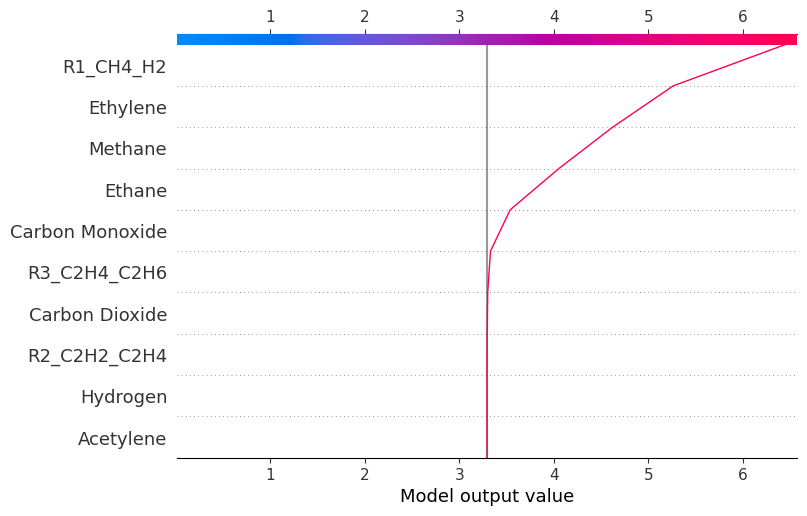

In [ ]:
# Explaining 3 samples for each class
for class_name in le.classes_:
    explain_multiple_samples(
        class_name=class_name,
        shap_values=shap_values,
        explainer=explainer,
        X_test=X_test,
        le=le,
        n_samples=3
    )
